In [68]:
import cianparser
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [69]:
voronezh_parser = cianparser.CianParser(location="Воронеж")

In [70]:
df = pd.read_csv('cian.csv', sep=';')

In [71]:
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,ВДК,developer,https://voronezh.cian.ru/sale/flat/305976031/,Воронеж,sale,flat,2,23,2,58.30,8383540,Центральный,NaN,NaN,NaN,Бунин ЖК
1,Адресъ,real_estate_agent,https://voronezh.cian.ru/sale/flat/269048886/,Воронеж,sale,flat,11,11,2,92.20,13800000,Ленинский,Свободы,37,NaN,NaN
2,Сота Трансферт,real_estate_agent,https://voronezh.cian.ru/sale/flat/313518644/,Воронеж,sale,flat,4,5,1,17.40,1700000,Ленинский,Бакунина,2,NaN,NaN
3,Инстеп,developer,https://voronezh.cian.ru/sale/flat/313538502/,Воронеж,sale,flat,14,18,1,36.76,5826460,Ленинский,Краснознаменная,72,NaN,Инстеп.Краснознаменная
4,ID 105148828,homeowner,https://voronezh.cian.ru/sale/flat/310090913/,Воронеж,sale,flat,10,23,3,82.70,25500000,Центральный,Карла Маркса,67/2,NaN,Солнечный Олимп


In [72]:
df.drop(['author', 'url', 'deal_type', 'accommodation_type', 'location'], axis=1)

,author_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,developer,2,23,2,58.30,8383540,Центральный,NaN,NaN,NaN,Бунин ЖК
1,real_estate_agent,11,11,2,92.20,13800000,Ленинский,Свободы,37,NaN,NaN
2,real_estate_agent,4,5,1,17.40,1700000,Ленинский,Бакунина,2,NaN,NaN
3,developer,14,18,1,36.76,5826460,Ленинский,Краснознаменная,72,NaN,Инстеп.Краснознаменная
4,homeowner,10,23,3,82.70,25500000,Центральный,Карла Маркса,67/2,NaN,Солнечный Олимп
...,...,...,...,...,...,...,...,...,...,...,...
1144,representative_developer,19,21,1,52.32,7788559,Железнодорожный,набережная Чуева,7,NaN,Z-town
1145,representative_developer,1,14,2,62.30,7750015,Железнодорожный,Остужева,52/5,NaN,Ключи-клаб
1146,homeowner,9,17,2,75.00,7950000,Коминтерновский,бульвар Победы,50Б,NaN,NaN
1147,developer,4,23,2,70.30,9961510,Центральный,NaN,NaN,NaN,Бунин ЖК


In [73]:
df.describe()

,floor,floors_count,rooms_count,total_meters,price,underground
count,1149.000000,1149.000000,1149.000000,1149.000000,1.149000e+03,0.0
mean,6.944299,16.793734,1.544822,51.423351,6.548279e+06,NaN
std,5.660582,5.277666,0.744867,21.479921,3.604543e+06,NaN
min,1.000000,1.000000,-1.000000,17.300000,1.172223e+06,NaN
25%,2.000000,13.000000,1.000000,39.600000,4.999000e+06,NaN
50%,5.000000,17.000000,1.000000,46.100000,5.827769e+06,NaN
75%,11.000000,20.000000,2.000000,58.300000,7.070824e+06,NaN
max,27.000000,31.000000,5.000000,275.400000,4.700000e+07,NaN


In [74]:
df['underground'].unique()

array([nan])

In [75]:
df = df.drop(['author', 'url', 'deal_type', 'accommodation_type', 'location', 'underground'], axis=1)

In [76]:
df.head()

,author_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,residential_complex
0,developer,2,23,2,58.30,8383540,Центральный,NaN,NaN,Бунин ЖК
1,real_estate_agent,11,11,2,92.20,13800000,Ленинский,Свободы,37,NaN
2,real_estate_agent,4,5,1,17.40,1700000,Ленинский,Бакунина,2,NaN
3,developer,14,18,1,36.76,5826460,Ленинский,Краснознаменная,72,Инстеп.Краснознаменная
4,homeowner,10,23,3,82.70,25500000,Центральный,Карла Маркса,67/2,Солнечный Олимп


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author_type          1111 non-null   object 
 1   floor                1149 non-null   int64  
 2   floors_count         1149 non-null   int64  
 3   rooms_count          1149 non-null   int64  
 4   total_meters         1149 non-null   float64
 5   price                1149 non-null   int64  
 6   district             1149 non-null   object 
 7   street               1006 non-null   object 
 8   house_number         825 non-null    object 
 9   residential_complex  1028 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 89.9+ KB


In [78]:
df.isnull().sum()

author_type             38
floor                    0
floors_count             0
rooms_count              0
total_meters             0
price                    0
district                 0
street                 143
house_number           324
residential_complex    121
dtype: int64

In [79]:
df['full_address'] = df['street'] + ' ' +df['house_number']

In [80]:
df

,author_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,residential_complex,full_address
0,developer,2,23,2,58.30,8383540,Центральный,NaN,NaN,Бунин ЖК,NaN
1,real_estate_agent,11,11,2,92.20,13800000,Ленинский,Свободы,37,NaN,Свободы 37
2,real_estate_agent,4,5,1,17.40,1700000,Ленинский,Бакунина,2,NaN,Бакунина 2
3,developer,14,18,1,36.76,5826460,Ленинский,Краснознаменная,72,Инстеп.Краснознаменная,Краснознаменная 72
4,homeowner,10,23,3,82.70,25500000,Центральный,Карла Маркса,67/2,Солнечный Олимп,Карла Маркса 67/2
...,...,...,...,...,...,...,...,...,...,...,...
1144,representative_developer,19,21,1,52.32,7788559,Железнодорожный,набережная Чуева,7,Z-town,набережная Чуева 7
1145,representative_developer,1,14,2,62.30,7750015,Железнодорожный,Остужева,52/5,Ключи-клаб,Остужева 52/5
1146,homeowner,9,17,2,75.00,7950000,Коминтерновский,бульвар Победы,50Б,NaN,бульвар Победы 50Б
1147,developer,4,23,2,70.30,9961510,Центральный,NaN,NaN,Бунин ЖК,NaN


In [81]:
df = df.drop(['street', 'house_number'], axis=1)

In [82]:
df

,author_type,floor,floors_count,rooms_count,total_meters,price,district,residential_complex,full_address
0,developer,2,23,2,58.30,8383540,Центральный,Бунин ЖК,NaN
1,real_estate_agent,11,11,2,92.20,13800000,Ленинский,NaN,Свободы 37
2,real_estate_agent,4,5,1,17.40,1700000,Ленинский,NaN,Бакунина 2
3,developer,14,18,1,36.76,5826460,Ленинский,Инстеп.Краснознаменная,Краснознаменная 72
4,homeowner,10,23,3,82.70,25500000,Центральный,Солнечный Олимп,Карла Маркса 67/2
...,...,...,...,...,...,...,...,...,...
1144,representative_developer,19,21,1,52.32,7788559,Железнодорожный,Z-town,набережная Чуева 7
1145,representative_developer,1,14,2,62.30,7750015,Железнодорожный,Ключи-клаб,Остужева 52/5
1146,homeowner,9,17,2,75.00,7950000,Коминтерновский,NaN,бульвар Победы 50Б
1147,developer,4,23,2,70.30,9961510,Центральный,Бунин ЖК,NaN


In [83]:
df.describe()

,floor,floors_count,rooms_count,total_meters,price
count,1149.000000,1149.000000,1149.000000,1149.000000,1.149000e+03
mean,6.944299,16.793734,1.544822,51.423351,6.548279e+06
std,5.660582,5.277666,0.744867,21.479921,3.604543e+06
min,1.000000,1.000000,-1.000000,17.300000,1.172223e+06
25%,2.000000,13.000000,1.000000,39.600000,4.999000e+06
50%,5.000000,17.000000,1.000000,46.100000,5.827769e+06
75%,11.000000,20.000000,2.000000,58.300000,7.070824e+06
max,27.000000,31.000000,5.000000,275.400000,4.700000e+07


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author_type          1111 non-null   object 
 1   floor                1149 non-null   int64  
 2   floors_count         1149 non-null   int64  
 3   rooms_count          1149 non-null   int64  
 4   total_meters         1149 non-null   float64
 5   price                1149 non-null   int64  
 6   district             1149 non-null   object 
 7   residential_complex  1028 non-null   object 
 8   full_address         825 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 80.9+ KB


In [85]:
df.fillna('Unknown')

,author_type,floor,floors_count,rooms_count,total_meters,price,district,residential_complex,full_address
0,developer,2,23,2,58.30,8383540,Центральный,Бунин ЖК,Unknown
1,real_estate_agent,11,11,2,92.20,13800000,Ленинский,Unknown,Свободы 37
2,real_estate_agent,4,5,1,17.40,1700000,Ленинский,Unknown,Бакунина 2
3,developer,14,18,1,36.76,5826460,Ленинский,Инстеп.Краснознаменная,Краснознаменная 72
4,homeowner,10,23,3,82.70,25500000,Центральный,Солнечный Олимп,Карла Маркса 67/2
...,...,...,...,...,...,...,...,...,...
1144,representative_developer,19,21,1,52.32,7788559,Железнодорожный,Z-town,набережная Чуева 7
1145,representative_developer,1,14,2,62.30,7750015,Железнодорожный,Ключи-клаб,Остужева 52/5
1146,homeowner,9,17,2,75.00,7950000,Коминтерновский,Unknown,бульвар Победы 50Б
1147,developer,4,23,2,70.30,9961510,Центральный,Бунин ЖК,Unknown


In [86]:
import seaborn as sns

<Axes: >

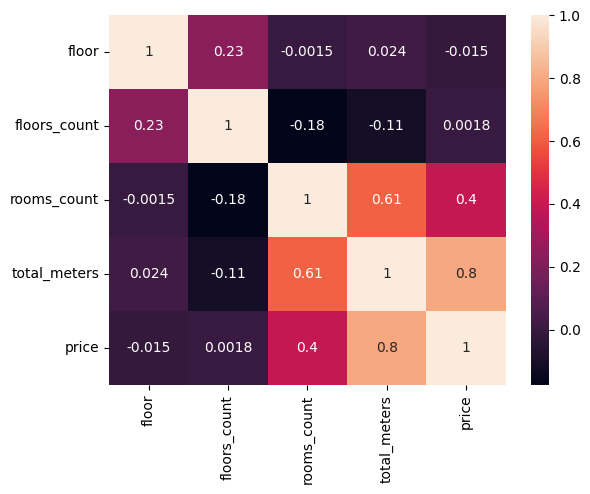

In [87]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

In [88]:
df.head()

,author_type,floor,floors_count,rooms_count,total_meters,price,district,residential_complex,full_address
0,developer,2,23,2,58.30,8383540,Центральный,Бунин ЖК,NaN
1,real_estate_agent,11,11,2,92.20,13800000,Ленинский,NaN,Свободы 37
2,real_estate_agent,4,5,1,17.40,1700000,Ленинский,NaN,Бакунина 2
3,developer,14,18,1,36.76,5826460,Ленинский,Инстеп.Краснознаменная,Краснознаменная 72
4,homeowner,10,23,3,82.70,25500000,Центральный,Солнечный Олимп,Карла Маркса 67/2


In [89]:
district_prices = df.groupby('district')['price'].mean().reset_index()
district_prices['price'] = district_prices['price'].astype(int)
district_prices_sorted = district_prices.sort_values(by='price', ascending=False)


In [90]:
district_prices

,district,price
0,Железнодорожный,6040843
1,Коминтерновский,5839178
2,Левобережный,5362914
3,Ленинский,8135493
4,Советский,5233530
5,Центральный,8293554


In [91]:
district_prices_sorted

,district,price
5,Центральный,8293554
3,Ленинский,8135493
0,Железнодорожный,6040843
1,Коминтерновский,5839178
2,Левобережный,5362914
4,Советский,5233530


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Центральный'),
  Text(1, 0, 'Ленинский'),
  Text(2, 0, 'Железнодорожный'),
  Text(3, 0, 'Коминтерновский'),
  Text(4, 0, 'Левобережный'),
  Text(5, 0, 'Советский')])

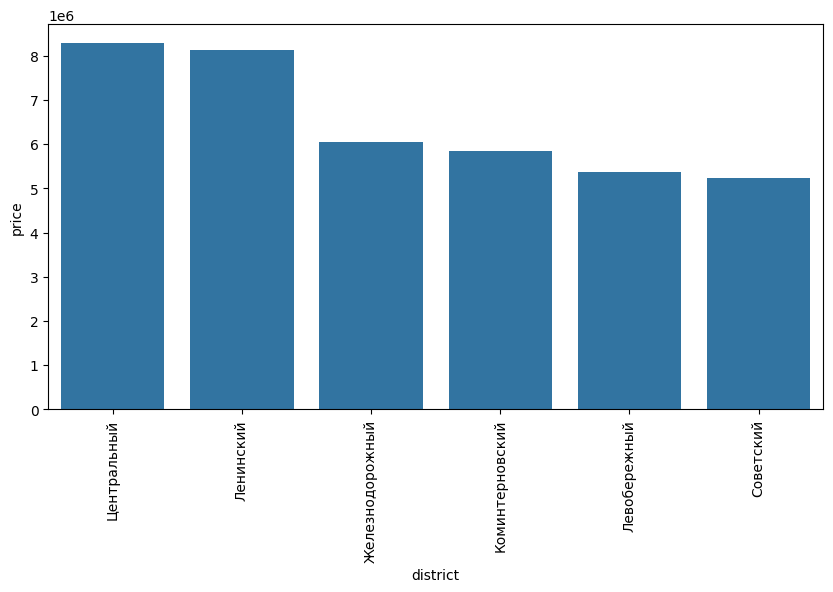

In [92]:
plt.figure(figsize = (10,5))
sns.barplot(data=district_prices_sorted, x = 'district', y = 'price')
plt.xticks(rotation=90)


<Axes: xlabel='price', ylabel='Count'>

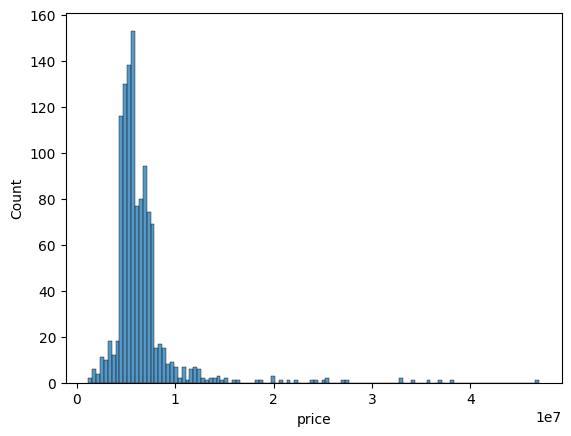

In [93]:
sns.histplot(data=df, x='price')

(0.0, 150.0)

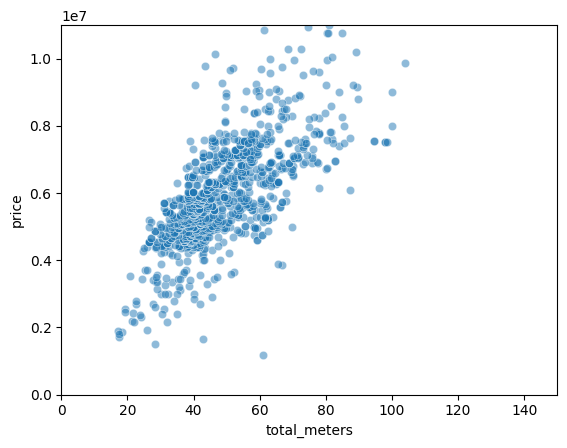

In [94]:
sns.scatterplot(data=df, x='total_meters', y = 'price', alpha = 0.5)
plt.ylim(0,11000000)
plt.xlim(0, 150)

In [95]:
df.head()

,author_type,floor,floors_count,rooms_count,total_meters,price,district,residential_complex,full_address
0,developer,2,23,2,58.30,8383540,Центральный,Бунин ЖК,NaN
1,real_estate_agent,11,11,2,92.20,13800000,Ленинский,NaN,Свободы 37
2,real_estate_agent,4,5,1,17.40,1700000,Ленинский,NaN,Бакунина 2
3,developer,14,18,1,36.76,5826460,Ленинский,Инстеп.Краснознаменная,Краснознаменная 72
4,homeowner,10,23,3,82.70,25500000,Центральный,Солнечный Олимп,Карла Маркса 67/2


In [96]:
df = df.fillna('Unknown')

In [97]:
df.head()

,author_type,floor,floors_count,rooms_count,total_meters,price,district,residential_complex,full_address
0,developer,2,23,2,58.30,8383540,Центральный,Бунин ЖК,Unknown
1,real_estate_agent,11,11,2,92.20,13800000,Ленинский,Unknown,Свободы 37
2,real_estate_agent,4,5,1,17.40,1700000,Ленинский,Unknown,Бакунина 2
3,developer,14,18,1,36.76,5826460,Ленинский,Инстеп.Краснознаменная,Краснознаменная 72
4,homeowner,10,23,3,82.70,25500000,Центральный,Солнечный Олимп,Карла Маркса 67/2


In [98]:
df['author_type'].nunique()

7

In [99]:
df['district'].nunique()

6

In [100]:
df['residential_complex'].nunique()

112

In [101]:
from sklearn.preprocessing import LabelEncoder


In [102]:
columns_for_le = ['author_type','full_address', 'residential_complex']
for column in columns_for_le:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])

In [103]:
df

,author_type,floor,floors_count,rooms_count,total_meters,price,district,residential_complex,full_address
0,1,2,23,2,58.30,8383540,Центральный,25,157
1,3,11,11,2,92.20,13800000,Ленинский,7,125
2,3,4,5,1,17.40,1700000,Ленинский,7,26
3,1,14,18,1,36.76,5826460,Ленинский,51,175
4,2,10,23,3,82.70,25500000,Центральный,91,62
...,...,...,...,...,...,...,...,...,...
1144,5,19,21,1,52.32,7788559,Железнодорожный,8,241
1145,5,1,14,2,62.30,7750015,Железнодорожный,58,107
1146,2,9,17,2,75.00,7950000,Коминтерновский,7,239
1147,1,4,23,2,70.30,9961510,Центральный,25,157


In [104]:
df = pd.get_dummies(data = df, columns=['district'])

In [105]:
df

,author_type,floor,floors_count,rooms_count,total_meters,price,residential_complex,full_address,district_Железнодорожный,district_Коминтерновский,district_Левобережный,district_Ленинский,district_Советский,district_Центральный
0,1,2,23,2,58.30,8383540,25,157,False,False,False,False,False,True
1,3,11,11,2,92.20,13800000,7,125,False,False,False,True,False,False
2,3,4,5,1,17.40,1700000,7,26,False,False,False,True,False,False
3,1,14,18,1,36.76,5826460,51,175,False,False,False,True,False,False
4,2,10,23,3,82.70,25500000,91,62,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,5,19,21,1,52.32,7788559,8,241,True,False,False,False,False,False
1145,5,1,14,2,62.30,7750015,58,107,True,False,False,False,False,False
1146,2,9,17,2,75.00,7950000,7,239,False,True,False,False,False,False
1147,1,4,23,2,70.30,9961510,25,157,False,False,False,False,False,True


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X = df.drop(['price'], axis= 1)

In [108]:
y = df['price']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [111]:
model = RandomForestRegressor(n_estimators=100)

In [112]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [113]:
y_predict = model.predict(X_test)

In [114]:
mape = mean_absolute_percentage_error(y_test, y_predict)

In [115]:
mape

0.07173459365721764

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=3)

In [118]:
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01)

In [119]:
y_pred = model.predict(X_test)


In [120]:
mape = mean_absolute_percentage_error(y_test, y_pred)

In [121]:
mape

0.16511720299160007